<a href="https://colab.research.google.com/github/GundekariYeshashwini/GENERATIVE_AI_2025/blob/main/2023_W8_A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install pandas scikit-learn matplotlib seaborn tensorflow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0337 - loss: 1.8951 - val_accuracy: 0.0281 - val_loss: 1.8910
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0263 - loss: 1.9025 - val_accuracy: 0.0281 - val_loss: 1.8906
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0315 - loss: 1.9055 - val_accuracy: 0.0281 - val_loss: 1.8901
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0337 - loss: 1.8960 - val_accuracy: 0.0281 - val_loss: 1.8896
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0280 - loss: 1.8957 - val_accuracy: 0.0281 - val_loss: 1.8891
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0345 - loss: 1.8967 - val_accuracy: 0.0281 - val_loss: 1.8886
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0331 - loss: 1.9001 - val_accuracy: 0.0281 - val_loss: 1.8881
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0258 - loss: 1.8963 - val_accuracy: 0.0312

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training Accuracy: 0.0844
Testing Accuracy: 0.0906


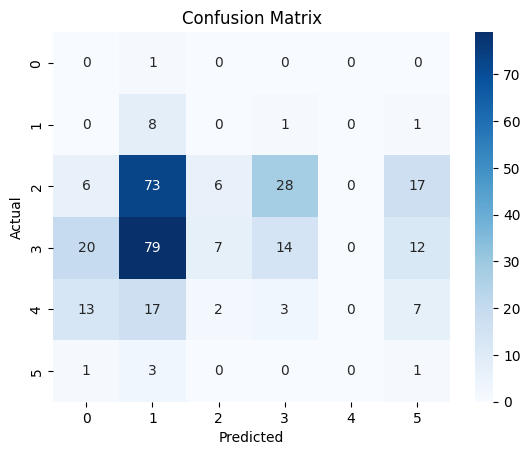

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.0442    0.8000    0.0838        10
           2     0.4000    0.0462    0.0828       130
           3     0.3043    0.1061    0.1573       132
           4     0.0000    0.0000    0.0000        42
           5     0.0263    0.2000    0.0465         5

    accuracy                         0.0906       320
   macro avg     0.1291    0.1920    0.0617       320
weighted avg     0.2898    0.0906    0.1019       320



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Wine Quality: 4


In [6]:
# wine_quality_ann.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Load dataset (downloaded manually from Google Drive link)
# The original separator was ';', but the data might be using a comma instead
data = pd.read_csv("/content/drive/MyDrive/winequality-red.csv", sep=',')  # Changed separator to ','

# Feature and label separation
X = data.drop('quality', axis=1)
y = data['quality']

# Convert quality labels to categories (e.g. 3–9 → one-hot encoding)
y_categorical = to_categorical(y - y.min())  # normalize to start at 0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer for multi-class

# Compile model
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Save model
model.save("wine_quality_model.h5")

# -------- Evaluation --------
# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = accuracy_score(y_true, y_pred_classes)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, digits=4))

# -------- Deployment / Load Model --------
def predict_wine_quality(sample_features):
    model = load_model("wine_quality_model.h5")
    scaled_features = scaler.transform([sample_features])
    prediction = model.predict(scaled_features)
    predicted_class = np.argmax(prediction)
    quality = predicted_class + y.min()
    return quality

# Example prediction (using a test sample)
sample = X.iloc[0].values
predicted_quality = predict_wine_quality(sample)
print(f"Predicted Wine Quality: {predicted_quality}")
